In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('Arquivos/telecom_customer_churn.csv')
pd.set_option('display.max_columns', None)
display(df)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,13,Offer D,Yes,46.68,No,Yes,DSL,59.0,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,22,Offer D,Yes,16.20,Yes,Yes,Fiber Optic,17.0,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,2,Offer E,Yes,18.62,No,Yes,DSL,51.0,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,67,Offer A,Yes,2.12,No,Yes,Cable,58.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


In [3]:
df_populacao = pd.read_csv('Arquivos/telecom_zipcode_population.csv')
display(df_populacao)

,Zip Code,Population
0,90001,54492
1,90002,44586
2,90003,58198
3,90004,67852
4,90005,43019
...,...,...
1666,96145,4002
1667,96146,942
1668,96148,678
1669,96150,33038


In [4]:
df = pd.merge(df, df_populacao, left_on=['Zip Code'], right_on=['Zip Code'], how='left')


colunas = df.columns.tolist()
colunas.insert(7, colunas.pop(colunas.index('Population')))
df = df[colunas]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Population                         7043 non-null   int64  
 8   Latitude                           7043 non-null   float64
 9   Longitude                          7043 non-null   float64
 10  Number of Referrals                7043 non-null   int64  
 11  Tenure in Months                   7043 non-null   int64

In [6]:
# Verificando a cardinalidade dos dados
df.nunique()

Customer ID                          7043
Gender                                  2
Age                                    62
Married                                 2
Number of Dependents                   10
City                                 1106
Zip Code                             1626
Population                           1569
Latitude                             1626
Longitude                            1625
Number of Referrals                    12
Tenure in Months                       72
Offer                                   6
Phone Service                           2
Avg Monthly Long Distance Charges    3583
Multiple Lines                          2
Internet Service                        2
Internet Type                           3
Avg Monthly GB Download                49
Online Security                         2
Online Backup                           2
Device Protection Plan                  2
Premium Tech Support                    2
Streaming TV                      

# Renomeando as colunas, traduzindo para o portugues

In [7]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Population', 'Latitude', 'Longitude',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [8]:
df = df.rename(columns={'Customer ID':'ID_cliente',
                        'Gender': 'Genero',
                        'Age': 'Idade',
                        'Married': 'Casado',
                        'Number of Dependents':'Qtd_dependentes',
                        'City': 'Cidade',
                        'Zip Code':'Codigo_postal',
                        'Population': 'Populacao',
                        'Number of Referrals':'Qtd_referencias',
                        'Tenure in Months':'Meses_na_base',
                        'Offer':'Ultima_oferta',
                        'Phone Service':'Servico_telefone',
                        'Avg Monthly Long Distance Charges':'Recarga_longa_distancia',
                        'Multiple Lines':'Multiplas_linhas',
                        'Internet Service':'Servico_internet',
                        'Internet Type':'Tipo_internet',
                        'Avg Monthly GB Download':'Media_mensal_download_GB',
                        'Online Security':'Servico_seguranca',
                        'Online Backup':'Servico_backup',
                        'Device Protection Plan':'Servico_protecao_dispositivo',
                        'Premium Tech Support':'Servico_suporte_preferencial',
                        'Streaming TV':'Servico_tv',
                        'Streaming Movies':'Servico_filmes',
                        'Streaming Music':'Servico_musica',
                        'Unlimited Data':'Servico_ilimitado_dados',
                        'Contract':'Tipo_contrato',
                        'Paperless Billing':'Faturamento_sem_papel',
                        'Payment Method':'Tipo_pagamento',
                        'Monthly Charge':'Cobranca_mensal',
                        'Total Charges':'Total_cobranca',
                        'Total Refunds':'Total_reembolsos',
                        'Total Extra Data Charges':'Cobrancas_extras',
                        'Total Long Distance Charges':'Cobrancas_longa_distancia',
                        'Total Revenue':'Total_cobranca_geral',
                        'Customer Status':'Situacao_cliente',
                        'Churn Category':'Categoria_cancelamento',
                        'Churn Reason':'Motivo_cancelamento' }, inplace=False)


In [9]:
display(df)

,ID_cliente,Genero,Idade,Casado,Qtd_dependentes,Cidade,Codigo_postal,Populacao,Latitude,Longitude,Qtd_referencias,Meses_na_base,Ultima_oferta,Servico_telefone,Recarga_longa_distancia,Multiplas_linhas,Servico_internet,Tipo_internet,Media_mensal_download_GB,Servico_seguranca,Servico_backup,Servico_protecao_dispositivo,Servico_suporte_preferencial,Servico_tv,Servico_filmes,Servico_musica,Servico_ilimitado_dados,Tipo_contrato,Faturamento_sem_papel,Tipo_pagamento,Cobranca_mensal,Total_cobranca,Total_reembolsos,Cobrancas_extras,Cobrancas_longa_distancia,Total_cobranca_geral,Situacao_cliente,Categoria_cancelamento,Motivo_cancelamento
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,4498,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,31297,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,62069,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,46677,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,42853,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,44652,32.759327,-116.997260,0,13,Offer D,Yes,46.68,No,Yes,DSL,59.0,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,16525,37.734971,-120.954271,1,22,Offer D,Yes,16.20,Yes,Yes,Fiber Optic,17.0,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,383,39.108252,-123.645121,0,2,Offer E,Yes,18.62,No,Yes,DSL,51.0,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,12173,33.001813,-117.263628,5,67,Offer A,Yes,2.12,No,Yes,Cable,58.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


# Analise do dataframe

In [10]:
df.count()

ID_cliente                      7043
Genero                          7043
Idade                           7043
Casado                          7043
Qtd_dependentes                 7043
Cidade                          7043
Codigo_postal                   7043
Populacao                       7043
Latitude                        7043
Longitude                       7043
Qtd_referencias                 7043
Meses_na_base                   7043
Ultima_oferta                   7043
Servico_telefone                7043
Recarga_longa_distancia         6361
Multiplas_linhas                6361
Servico_internet                7043
Tipo_internet                   5517
Media_mensal_download_GB        5517
Servico_seguranca               5517
Servico_backup                  5517
Servico_protecao_dispositivo    5517
Servico_suporte_preferencial    5517
Servico_tv                      5517
Servico_filmes                  5517
Servico_musica                  5517
Servico_ilimitado_dados         5517
T

In [11]:
print(df.groupby(['Servico_telefone'])['Servico_telefone'].count())
print(df.groupby(['Servico_internet'])['Servico_internet'].count())


Servico_telefone
No      682
Yes    6361
Name: Servico_telefone, dtype: int64
Servico_internet
No     1526
Yes    5517
Name: Servico_internet, dtype: int64


In [12]:
print(df[df['Servico_internet']=='No'].count())
print('---------------------------------------')
print(df[df['Servico_telefone']=='No'].count())

ID_cliente                      1526
Genero                          1526
Idade                           1526
Casado                          1526
Qtd_dependentes                 1526
Cidade                          1526
Codigo_postal                   1526
Populacao                       1526
Latitude                        1526
Longitude                       1526
Qtd_referencias                 1526
Meses_na_base                   1526
Ultima_oferta                   1526
Servico_telefone                1526
Recarga_longa_distancia         1526
Multiplas_linhas                1526
Servico_internet                1526
Tipo_internet                      0
Media_mensal_download_GB           0
Servico_seguranca                  0
Servico_backup                     0
Servico_protecao_dispositivo       0
Servico_suporte_preferencial       0
Servico_tv                         0
Servico_filmes                     0
Servico_musica                     0
Servico_ilimitado_dados            0
T

In [13]:
df.loc[df['Tipo_internet'].isnull(),'Tipo_internet'] = 'No'
df.loc[df['Media_mensal_download_GB'].isnull(),'Media_mensal_download_GB'] = 0
df.loc[df['Servico_seguranca'].isnull(),'Servico_seguranca'] = 'No'
df.loc[df['Servico_backup'].isnull(),'Servico_backup'] = 'No'
df.loc[df['Servico_protecao_dispositivo'].isnull(),'Servico_protecao_dispositivo'] = 'No'
df.loc[df['Servico_suporte_preferencial'].isnull(),'Servico_suporte_preferencial'] = 'No'
df.loc[df['Servico_tv'].isnull(),'Servico_tv'] = 'No'
df.loc[df['Servico_filmes'].isnull(),'Servico_filmes'] = 'No'
df.loc[df['Servico_musica'].isnull(),'Servico_musica'] = 'No'
df.loc[df['Servico_ilimitado_dados'].isnull(),'Servico_ilimitado_dados'] = 'No'

df.loc[df['Recarga_longa_distancia'].isnull(),'Recarga_longa_distancia'] = 0
df.loc[df['Multiplas_linhas'].isnull(),'Multiplas_linhas'] = 'No'







In [14]:
print(df.groupby(['Situacao_cliente'])['Situacao_cliente'].count())
print(df.groupby(['Categoria_cancelamento'])['Categoria_cancelamento'].count())
print(df.groupby(['Motivo_cancelamento'])['Motivo_cancelamento'].count())

df.count()


Situacao_cliente
Churned    1869
Joined      454
Stayed     4720
Name: Situacao_cliente, dtype: int64
Categoria_cancelamento
Attitude           314
Competitor         841
Dissatisfaction    321
Other              182
Price              211
Name: Categoria_cancelamento, dtype: int64
Motivo_cancelamento
Attitude of service provider                  94
Attitude of support person                   220
Competitor had better devices                313
Competitor made better offer                 311
Competitor offered higher download speeds    100
Competitor offered more data                 117
Deceased                                       6
Don't know                                   130
Extra data charges                            39
Lack of affordable download/upload speed      30
Lack of self-service on Website               29
Limited range of services                     37
Long distance charges                         64
Moved                                         46
Network rel

ID_cliente                      7043
Genero                          7043
Idade                           7043
Casado                          7043
Qtd_dependentes                 7043
Cidade                          7043
Codigo_postal                   7043
Populacao                       7043
Latitude                        7043
Longitude                       7043
Qtd_referencias                 7043
Meses_na_base                   7043
Ultima_oferta                   7043
Servico_telefone                7043
Recarga_longa_distancia         7043
Multiplas_linhas                7043
Servico_internet                7043
Tipo_internet                   7043
Media_mensal_download_GB        7043
Servico_seguranca               7043
Servico_backup                  7043
Servico_protecao_dispositivo    7043
Servico_suporte_preferencial    7043
Servico_tv                      7043
Servico_filmes                  7043
Servico_musica                  7043
Servico_ilimitado_dados         7043
T

## Removendo Colunas que não serão usadas

In [15]:
df = df.drop(df[['Categoria_cancelamento','Motivo_cancelamento','ID_cliente','Latitude','Longitude']],axis = 1)

In [16]:
df

,Genero,Idade,Casado,Qtd_dependentes,Cidade,Codigo_postal,Populacao,Qtd_referencias,Meses_na_base,Ultima_oferta,Servico_telefone,Recarga_longa_distancia,Multiplas_linhas,Servico_internet,Tipo_internet,Media_mensal_download_GB,Servico_seguranca,Servico_backup,Servico_protecao_dispositivo,Servico_suporte_preferencial,Servico_tv,Servico_filmes,Servico_musica,Servico_ilimitado_dados,Tipo_contrato,Faturamento_sem_papel,Tipo_pagamento,Cobranca_mensal,Total_cobranca,Total_reembolsos,Cobrancas_extras,Cobrancas_longa_distancia,Total_cobranca_geral,Situacao_cliente
0,Female,37,Yes,0,Frazier Park,93225,4498,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed
1,Male,46,No,0,Glendale,91206,31297,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed
2,Male,50,No,0,Costa Mesa,92627,62069,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned
3,Male,78,Yes,0,Martinez,94553,46677,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned
4,Female,75,Yes,0,Camarillo,93010,42853,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,20,No,0,La Mesa,91941,44652,0,13,Offer D,Yes,46.68,No,Yes,DSL,59.0,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed
7039,Male,40,Yes,0,Riverbank,95367,16525,1,22,Offer D,Yes,16.20,Yes,Yes,Fiber Optic,17.0,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned
7040,Male,22,No,0,Elk,95432,383,0,2,Offer E,Yes,18.62,No,Yes,DSL,51.0,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined
7041,Male,21,Yes,0,Solana Beach,92075,12173,5,67,Offer A,Yes,2.12,No,Yes,Cable,58.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed


In [17]:
df = df[df['Situacao_cliente']!='Joined']
df.reset_index(drop=True, inplace=True)


In [18]:
df

,Genero,Idade,Casado,Qtd_dependentes,Cidade,Codigo_postal,Populacao,Qtd_referencias,Meses_na_base,Ultima_oferta,Servico_telefone,Recarga_longa_distancia,Multiplas_linhas,Servico_internet,Tipo_internet,Media_mensal_download_GB,Servico_seguranca,Servico_backup,Servico_protecao_dispositivo,Servico_suporte_preferencial,Servico_tv,Servico_filmes,Servico_musica,Servico_ilimitado_dados,Tipo_contrato,Faturamento_sem_papel,Tipo_pagamento,Cobranca_mensal,Total_cobranca,Total_reembolsos,Cobrancas_extras,Cobrancas_longa_distancia,Total_cobranca_geral,Situacao_cliente
0,Female,37,Yes,0,Frazier Park,93225,4498,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed
1,Male,46,No,0,Glendale,91206,31297,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed
2,Male,50,No,0,Costa Mesa,92627,62069,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned
3,Male,78,Yes,0,Martinez,94553,46677,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned
4,Female,75,Yes,0,Camarillo,93010,42853,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6584,Female,36,No,0,Fallbrook,92028,42239,0,4,None,Yes,2.01,No,No,No,0.0,No,No,No,No,No,No,No,No,Month-to-Month,No,Bank Withdrawal,20.95,85.50,0.00,0,8.04,93.54,Churned
6585,Female,20,No,0,La Mesa,91941,44652,0,13,Offer D,Yes,46.68,No,Yes,DSL,59.0,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed
6586,Male,40,Yes,0,Riverbank,95367,16525,1,22,Offer D,Yes,16.20,Yes,Yes,Fiber Optic,17.0,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned
6587,Male,21,Yes,0,Solana Beach,92075,12173,5,67,Offer A,Yes,2.12,No,Yes,Cable,58.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed


[3312 3277]


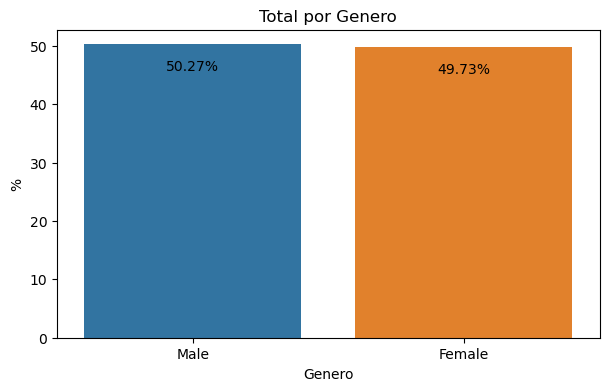

In [19]:
import seaborn as sns

contador = df['Genero'].value_counts()
print(contador.values)

total = contador.sum()
porcentagens = (contador / total) * 100


plt.figure(figsize=(7, 4))
ax = sns.barplot(x=contador.index, y=porcentagens.values)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()*.90), 
                ha='center', va='bottom')

plt.title('Total por Genero')
plt.xlabel('Genero')
plt.ylabel('%')

# Exibir o gráfico
plt.show()

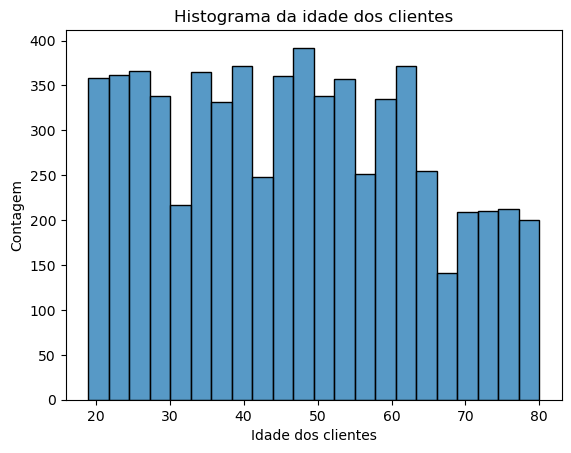

In [42]:


sns.histplot(df['Idade'])

plt.title('Histograma da idade dos clientes')
plt.xlabel('Idade dos clientes')
plt.ylabel('Contagem')

plt.show()





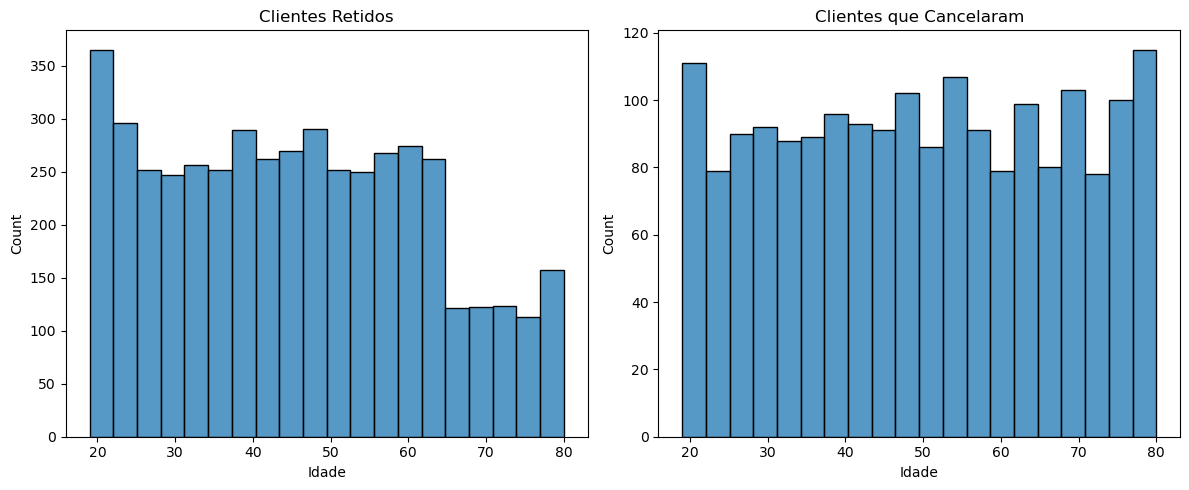

In [21]:
df_retidos_true = df[df['Situacao_cliente']=='Stayed']
df_retidos_false = df[df['Situacao_cliente']=='Churned']

'''
sns.histplot(df_retidos_true['Idade'])

plt.title('Histograma da idade dos clientes')
plt.xlabel('Comprimento da Sépala (cm)')
plt.ylabel('Contagem')

plt.show()
'''
num_bins = 20

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Criar os gráficos e adicioná-los aos subplots
sns.histplot(df_retidos_true['Idade'],bins=num_bins, ax=axes[0])
sns.histplot(df_retidos_false['Idade'],bins=num_bins, ax=axes[1])

# Adicionar títulos para cada subplot
axes[0].set_title('Clientes Retidos')
axes[1].set_title('Clientes que Cancelaram')


# Exibir os gráficos
plt.tight_layout()
plt.show()

## Engenharia de recursos

In [22]:
df1 = df.replace({'Genero': {'Male': 1, 'Female': 0},
            'Casado': {'Yes': 1, 'No': 0},
            'Servico_telefone': {'Yes': 1, 'No': 0},
            'Servico_internet': {'Yes': 1, 'No': 0},
            'Multiplas_linhas': {'Yes': 1, 'No': 0},
            'Servico_seguranca': {'Yes': 1, 'No': 0},
            'Servico_backup': {'Yes': 1, 'No': 0},
            'Servico_protecao_dispositivo': {'Yes': 1, 'No': 0},
            'Servico_suporte_preferencial': {'Yes': 1, 'No': 0},
            'Servico_tv': {'Yes': 1, 'No': 0},
            'Servico_filmes': {'Yes': 1, 'No': 0},
            'Servico_musica': {'Yes': 1, 'No': 0},
            'Servico_ilimitado_dados': {'Yes': 1, 'No': 0},
            'Faturamento_sem_papel': {'Yes': 1, 'No': 0},
            'Tipo_contrato': {'Month-to-Month': 0, 'One Year': 1,'Two Year': 2},
            'Situacao_cliente': {'Stayed': 1, 'Churned': 0}})


df1 = df1.rename(columns={'Genero':'Genero_masculino'}, inplace=False)


In [23]:
df1

,Genero_masculino,Idade,Casado,Qtd_dependentes,Cidade,Codigo_postal,Populacao,Qtd_referencias,Meses_na_base,Ultima_oferta,Servico_telefone,Recarga_longa_distancia,Multiplas_linhas,Servico_internet,Tipo_internet,Media_mensal_download_GB,Servico_seguranca,Servico_backup,Servico_protecao_dispositivo,Servico_suporte_preferencial,Servico_tv,Servico_filmes,Servico_musica,Servico_ilimitado_dados,Tipo_contrato,Faturamento_sem_papel,Tipo_pagamento,Cobranca_mensal,Total_cobranca,Total_reembolsos,Cobrancas_extras,Cobrancas_longa_distancia,Total_cobranca_geral,Situacao_cliente
0,0,37,1,0,Frazier Park,93225,4498,2,9,None,1,42.39,0,1,Cable,16.0,0,1,0,1,1,0,0,1,1,1,Credit Card,65.60,593.30,0.00,0,381.51,974.81,1
1,1,46,0,0,Glendale,91206,31297,0,9,None,1,10.69,1,1,Cable,10.0,0,0,0,0,0,1,1,0,0,0,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,1
2,1,50,0,0,Costa Mesa,92627,62069,0,4,Offer E,1,33.65,0,1,Fiber Optic,30.0,0,0,1,0,0,0,0,1,0,1,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,0
3,1,78,1,0,Martinez,94553,46677,1,13,Offer D,1,27.82,0,1,Fiber Optic,4.0,0,1,1,0,1,1,0,1,0,1,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,0
4,0,75,1,0,Camarillo,93010,42853,3,3,None,1,7.38,0,1,Fiber Optic,11.0,0,0,0,1,1,0,0,1,0,1,Credit Card,83.90,267.40,0.00,0,22.14,289.54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6584,0,36,0,0,Fallbrook,92028,42239,0,4,None,1,2.01,0,0,No,0.0,0,0,0,0,0,0,0,0,0,0,Bank Withdrawal,20.95,85.50,0.00,0,8.04,93.54,0
6585,0,20,0,0,La Mesa,91941,44652,0,13,Offer D,1,46.68,0,1,DSL,59.0,1,0,0,1,0,0,1,1,1,0,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,1
6586,1,40,1,0,Riverbank,95367,16525,1,22,Offer D,1,16.20,1,1,Fiber Optic,17.0,0,0,0,0,0,1,1,1,0,1,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,0
6587,1,21,1,0,Solana Beach,92075,12173,5,67,Offer A,1,2.12,0,1,Cable,58.0,1,0,1,1,0,1,1,1,2,0,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,1


Text(0.5, 1.0, 'Mapa de Calor da Correlação')

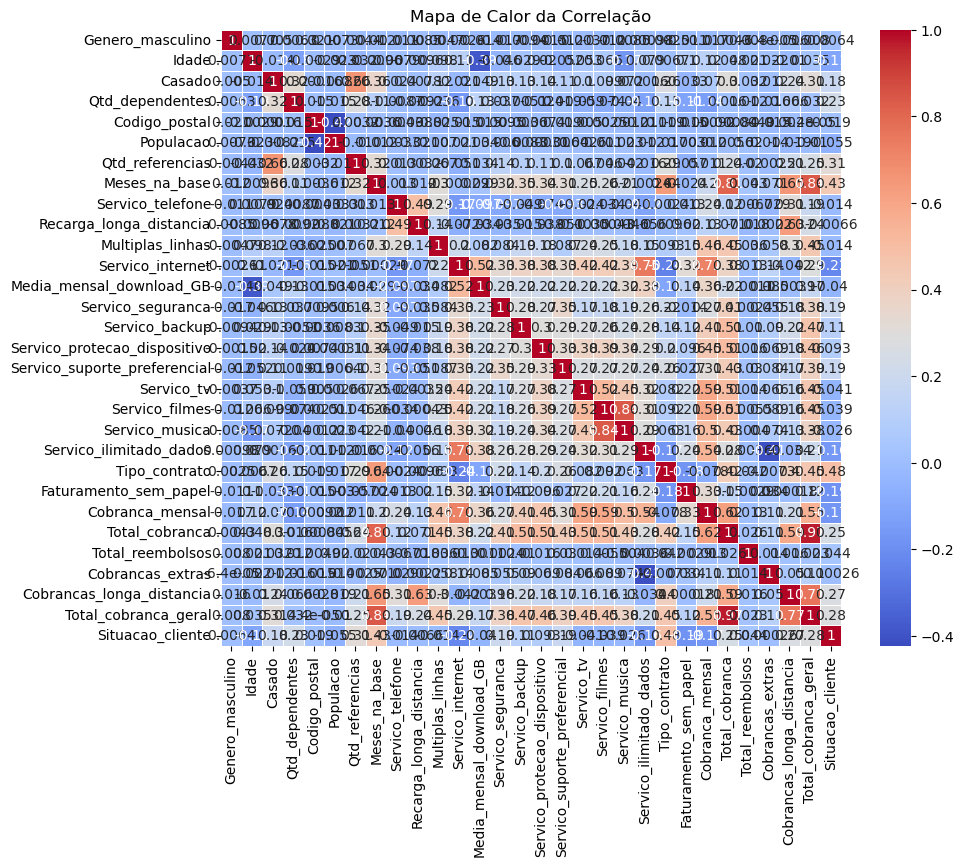

In [24]:
correlation_matrix = df1.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Mapa de Calor da Correlação')

Text(0.5, 1.0, 'Mapa de Calor da Correlação')

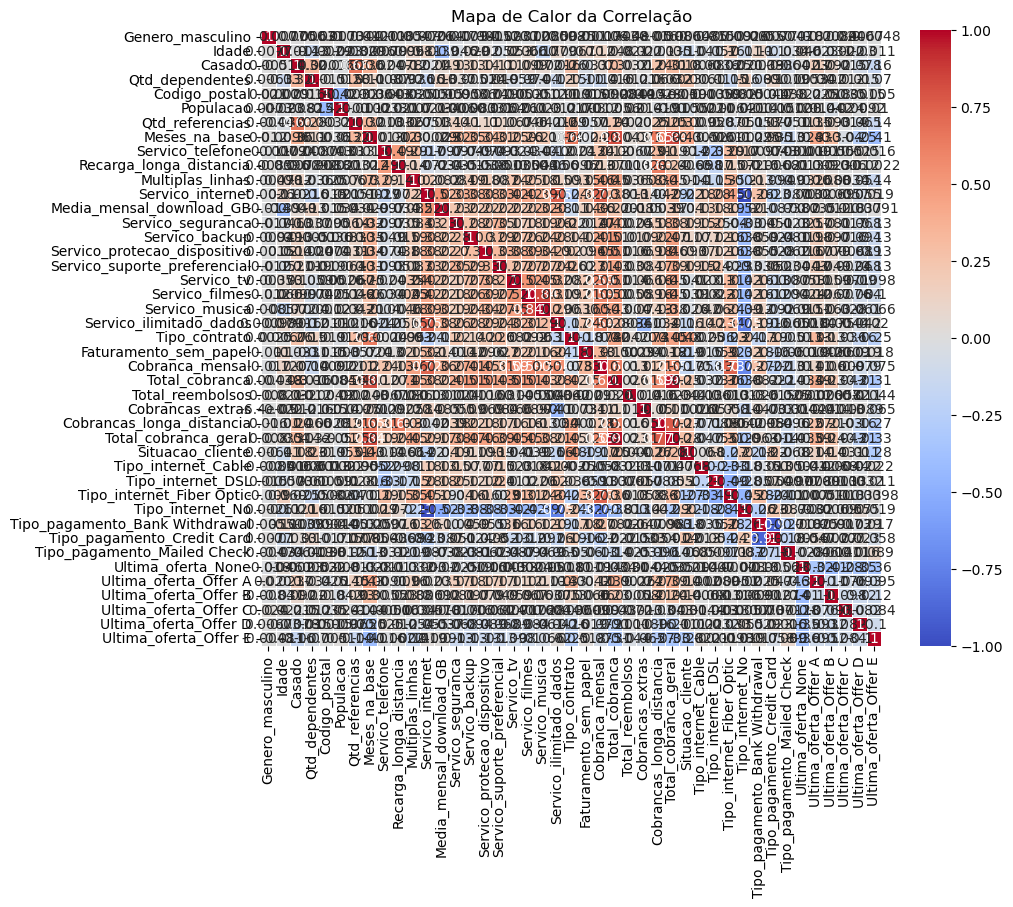

In [34]:
correlation_matrix = df1.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Mapa de Calor da Correlação')

<AxesSubplot:>

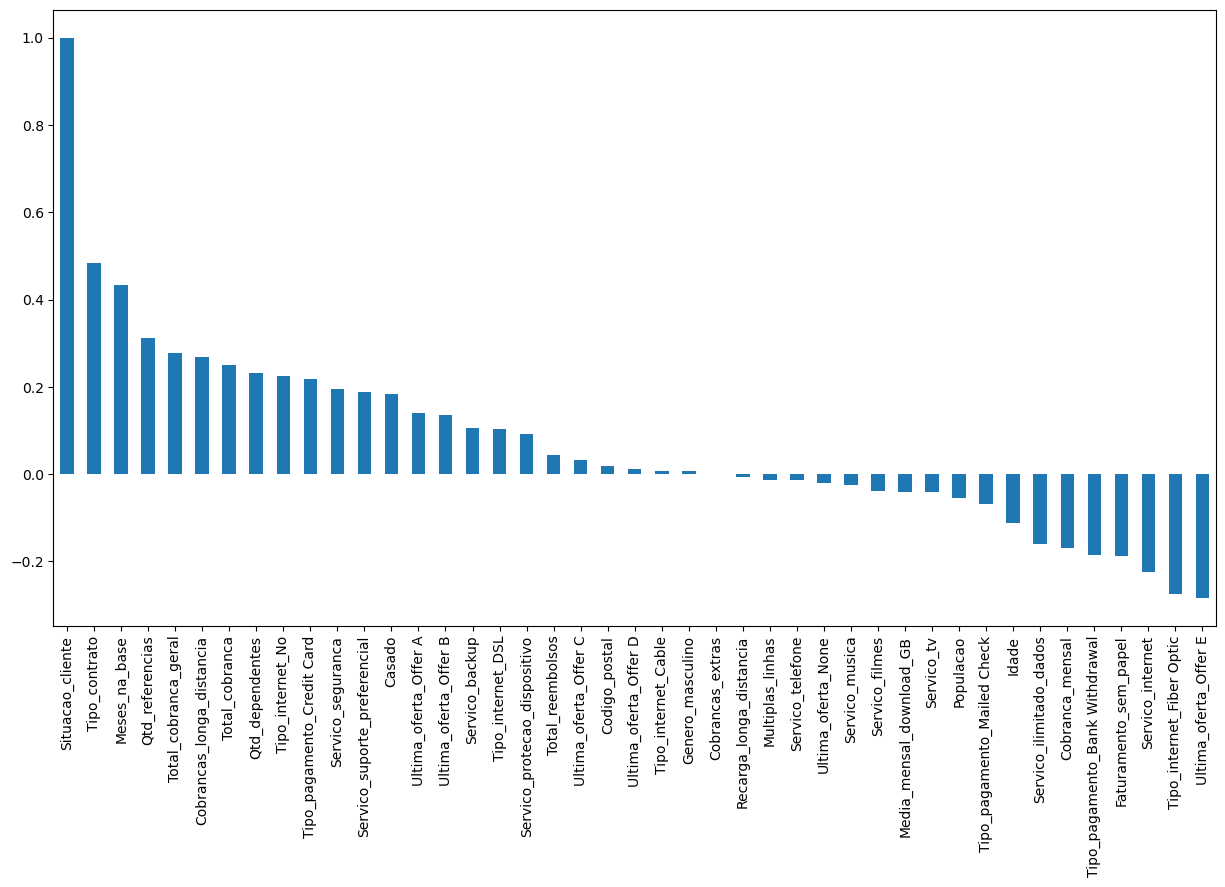

In [37]:
plt.figure(figsize=(15,8))
df1.corr()['Situacao_cliente'].sort_values(ascending = False).plot(kind='bar')

In [27]:
print(df.groupby(['Ultima_oferta'])['Ultima_oferta'].count())


Ultima_oferta
None       3598
Offer A     520
Offer B     824
Offer C     415
Offer D     602
Offer E     630
Name: Ultima_oferta, dtype: int64


In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


In [30]:
def ohe(df_padrao, coluna):
    ohencoder = OneHotEncoder(handle_unknown = 'ignore')
    ohencoder = ohencoder.fit(df_padrao[[coluna]])
    colunas = ohencoder.get_feature_names_out()
    ohe_df = pd.DataFrame(ohencoder.transform(df_padrao[[coluna]]).toarray(),
                         columns = colunas,
                         dtype='int32')
    return ohe_df
    

In [31]:

df_tipoInternet = ohe(df1, 'Tipo_internet')
df_tipoPagamento = ohe(df1, 'Tipo_pagamento')
df_tipoOferta = ohe(df1, 'Ultima_oferta')


In [32]:
df1 = pd.concat([df1,df_tipoInternet],axis=1)
df1 = pd.concat([df1,df_tipoPagamento],axis=1)
df1 = pd.concat([df1,df_tipoOferta],axis=1)

df1 = df1.drop(['Tipo_internet','Tipo_pagamento','Ultima_oferta'], axis=1)

In [40]:
df1


,Genero_masculino,Idade,Casado,Qtd_dependentes,Cidade,Codigo_postal,Populacao,Qtd_referencias,Meses_na_base,Servico_telefone,Recarga_longa_distancia,Multiplas_linhas,Servico_internet,Media_mensal_download_GB,Servico_seguranca,Servico_backup,Servico_protecao_dispositivo,Servico_suporte_preferencial,Servico_tv,Servico_filmes,Servico_musica,Servico_ilimitado_dados,Faturamento_sem_papel,Cobranca_mensal,Total_cobranca,Total_reembolsos,Cobrancas_extras,Cobrancas_longa_distancia,Total_cobranca_geral,Situacao_cliente,Tipo_internet_Cable,Tipo_internet_DSL,Tipo_internet_Fiber Optic,Tipo_internet_No,Tipo_contrato_Month-to-Month,Tipo_contrato_One Year,Tipo_contrato_Two Year,Tipo_pagamento_Bank Withdrawal,Tipo_pagamento_Credit Card,Tipo_pagamento_Mailed Check,Ultima_oferta_None,Ultima_oferta_Offer A,Ultima_oferta_Offer B,Ultima_oferta_Offer C,Ultima_oferta_Offer D,Ultima_oferta_Offer E
0,0,37,1,0,Frazier Park,93225,-0.830420,2,9,1,42.39,0,1,16.0,0,1,0,1,1,0,0,1,1,65.60,593.30,0.00,0,381.51,974.81,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,1,46,0,0,Glendale,91206,0.432710,0,9,1,10.69,1,1,10.0,0,0,0,0,0,1,1,0,0,-4.00,542.40,38.33,10,96.21,610.28,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
2,1,50,0,0,Costa Mesa,92627,1.883101,0,4,1,33.65,0,1,30.0,0,0,1,0,0,0,0,1,1,73.90,280.85,0.00,0,134.60,415.45,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
3,1,78,1,0,Martinez,94553,1.157622,1,13,1,27.82,0,1,4.0,0,1,1,0,1,1,0,1,1,98.00,1237.85,0.00,0,361.66,1599.51,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
4,0,75,1,0,Camarillo,93010,0.977384,3,3,1,7.38,0,1,11.0,0,0,0,1,1,0,0,1,1,83.90,267.40,0.00,0,22.14,289.54,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6584,0,36,0,0,Fallbrook,92028,0.948444,0,4,1,2.01,0,0,0.0,0,0,0,0,0,0,0,0,0,20.95,85.50,0.00,0,8.04,93.54,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0
6585,0,20,0,0,La Mesa,91941,1.062177,0,13,1,46.68,0,1,59.0,1,0,0,1,0,0,1,1,0,55.15,742.90,0.00,0,606.84,1349.74,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
6586,1,40,1,0,Riverbank,95367,-0.263546,1,22,1,16.20,1,1,17.0,0,0,0,0,0,1,1,1,1,85.10,1873.70,0.00,0,356.40,2230.10,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
6587,1,21,1,0,Solana Beach,92075,-0.468671,5,67,1,2.12,0,1,58.0,1,0,1,1,0,1,1,1,0,67.85,4627.65,0.00,0,142.04,4769.69,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0


In [35]:
df1.describe()

,Genero_masculino,Idade,Casado,Qtd_dependentes,Codigo_postal,Populacao,Qtd_referencias,Meses_na_base,Servico_telefone,Recarga_longa_distancia,Multiplas_linhas,Servico_internet,Media_mensal_download_GB,Servico_seguranca,Servico_backup,Servico_protecao_dispositivo,Servico_suporte_preferencial,Servico_tv,Servico_filmes,Servico_musica,Servico_ilimitado_dados,Tipo_contrato,Faturamento_sem_papel,Cobranca_mensal,Total_cobranca,Total_reembolsos,Cobrancas_extras,Cobrancas_longa_distancia,Total_cobranca_geral,Situacao_cliente,Tipo_internet_Cable,Tipo_internet_DSL,Tipo_internet_Fiber Optic,Tipo_internet_No,Tipo_pagamento_Bank Withdrawal,Tipo_pagamento_Credit Card,Tipo_pagamento_Mailed Check,Ultima_oferta_None,Ultima_oferta_Offer A,Ultima_oferta_Offer B,Ultima_oferta_Offer C,Ultima_oferta_Offer D,Ultima_oferta_Offer E
count,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000
mean,0.502656,46.760510,0.503567,0.476097,93491.504477,22116.481105,2.020944,34.499772,0.902261,23.004277,0.444073,0.796024,20.876461,0.299438,0.360449,0.362726,0.303081,0.403400,0.407194,0.369707,0.686144,0.796479,0.603126,65.030695,2432.042243,2.080938,7.169525,798.087251,3235.218082,0.716345,0.117469,0.233268,0.445288,0.203976,0.565791,0.382152,0.052056,0.546062,0.078919,0.125057,0.062984,0.091364,0.095614
std,0.500031,16.841362,0.500025,0.968499,1857.575392,21217.958517,3.024016,23.968734,0.296983,15.466844,0.496900,0.402982,20.406247,0.458047,0.480167,0.480823,0.459625,0.490617,0.491349,0.482762,0.464094,0.852697,0.489286,31.100727,2265.500080,8.125054,25.803163,853.767972,2854.600036,0.450805,0.322002,0.422943,0.497035,0.402982,0.495690,0.485950,0.222158,0.497912,0.269633,0.330809,0.242952,0.288148,0.294083
min,0.000000,19.000000,0.000000,0.000000,90001.000000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,18.850000,0.000000,0.000000,0.000000,21.610000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,33.000000,0.000000,0.000000,92103.000000,2271.000000,0.000000,12.000000,1.000000,9.250000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.800000,544.550000,0.000000,0.000000,106.680000,835.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,46.000000,1.000000,0.000000,93526.000000,17372.000000,0.000000,32.000000,1.000000,22.920000,0.000000,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,71.050000,1563.900000,0.000000,0.000000,472.680000,2376.450000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,60.000000,1.000000,0.000000,95333.000000,36149.000000,3.000000,57.000000,1.000000,36.440000,1.000000,1.000000,27.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,90.400000,4003.000000,0.000000,0.000000,1275.120000,5106.640000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,80.000000,1.000000,9.000000,96150.000000,105285.000000,11.000000,72.000000,1.000000,49.990000,1.000000,1.000000,85.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00

In [36]:
scaler = StandardScaler()
scaler = scaler.fit(df1[['Idade']])
df1['Idade'] = scaler.transform(df1[['Idade']])

scaler = StandardScaler()
scaler = scaler.fit(df1[['Qtd_dependentes']])
df1['Qtd_dependentes'] = scaler.transform(df1[['Qtd_dependentes']])

scaler = StandardScaler()
scaler = scaler.fit(df1[['Populacao']])
df1['Populacao'] = scaler.transform(df1[['Populacao']])

scaler = StandardScaler()
scaler = scaler.fit(df1[['Qtd_referencias']])
df1['Qtd_referencias'] = scaler.transform(df1[['Qtd_referencias']])

scaler = StandardScaler()
scaler = scaler.fit(df1[['Meses_na_base']])
df1['Meses_na_base'] = scaler.transform(df1[['Meses_na_base']])

scaler = StandardScaler()
scaler = scaler.fit(df1[['Recarga_longa_distancia']])
df1['Recarga_longa_distancia'] = scaler.transform(df1[['Recarga_longa_distancia']])

scaler = StandardScaler()
scaler = scaler.fit(df1[['Media_mensal_download_GB']])
df1['Media_mensal_download_GB'] = scaler.transform(df1[['Media_mensal_download_GB']])

scaler = StandardScaler()
scaler = scaler.fit(df1[['Cobranca_mensal']])
df1['Cobranca_mensal'] = scaler.transform(df1[['Cobranca_mensal']])

scaler = StandardScaler()
scaler = scaler.fit(df1[['Total_cobranca']])
df1['Total_cobranca'] = scaler.transform(df1[['Total_cobranca']])

scaler = StandardScaler()
scaler = scaler.fit(df1[['Total_reembolsos']])
df1['Total_reembolsos'] = scaler.transform(df1[['Total_reembolsos']])

scaler = StandardScaler()
scaler = scaler.fit(df1[['Cobrancas_extras']])
df1['Cobrancas_extras'] = scaler.transform(df1[['Cobrancas_extras']])

scaler = StandardScaler()
scaler = scaler.fit(df1[['Cobrancas_longa_distancia']])
df1['Cobrancas_longa_distancia'] = scaler.transform(df1[['Cobrancas_longa_distancia']])

scaler = StandardScaler()
scaler = scaler.fit(df1[['Total_cobranca_geral']])
df1['Total_cobranca_geral'] = scaler.transform(df1[['Total_cobranca_geral']])


# MACHINE LEARNING

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report




X = df1.drop(['Situacao_cliente','Cidade','Codigo_postal'], axis=1)
y = df1['Situacao_cliente'] 


X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_rf = RandomForestClassifier(random_state=42)

modelo_rf.fit(X_treino, y_treino)


previsoes = modelo_rf.predict(X_teste)

acuracia = accuracy_score(y_teste, previsoes)
print('Acurácia:', acuracia)

print(classification_report(y_teste, previsoes))

Acurácia: 0.8732928679817906
              precision    recall  f1-score   support

           0       0.86      0.68      0.76       383
           1       0.88      0.95      0.91       935

    accuracy                           0.87      1318
   macro avg       0.87      0.82      0.84      1318
weighted avg       0.87      0.87      0.87      1318



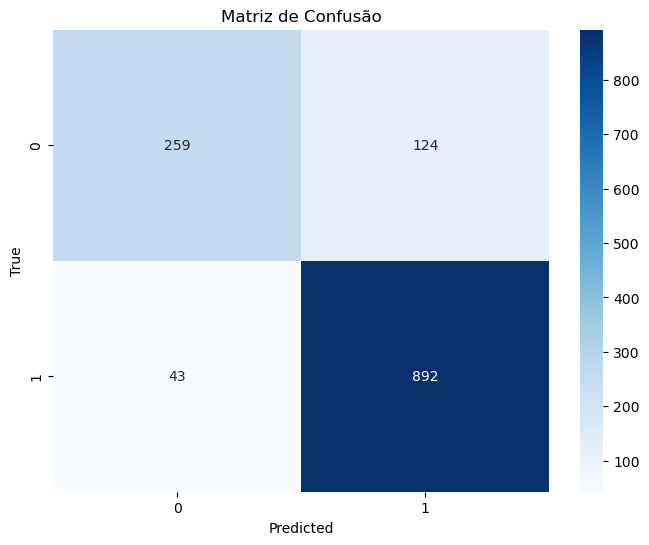

In [41]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y_teste, previsoes)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues',
            xticklabels=modelo_rf.classes_,
            yticklabels=modelo_rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusão')
plt.show()